In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
# autompg데이터를 사용해서 연비 예측
# 선형회귀
# 1mpg= 0.425144km/l

In [5]:
# [1] 데이터 전처리
# 데이터 불러오기
DATA_FILE= '../data/auto_mpg.csv'
autoDF=pd.read_csv(DATA_FILE)
autoDF.head(), autoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


(    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
 0  18.0          8         307.0        130    3504          12.0          70   
 1  15.0          8         350.0        165    3693          11.5          70   
 2  18.0          8         318.0        150    3436          11.0          70   
 3  16.0          8         304.0        150    3433          12.0          70   
 4  17.0          8         302.0        140    3449          10.5          70   
 
    origin                   car name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  
 3       1              amc rebel sst  
 4       1                ford torino  ,
 None)

In [6]:
search=autoDF['horsepower'].str.isdecimal()==False
drop_list= autoDF[search].index


In [7]:
# horsepower, carname이 object-> 인트변환+ carname 번호 컬럼 추가
# 1. horsepower
#데이터 확인
autoDF['horsepower'].str.isdecimal().value_counts()
search=autoDF['horsepower'].str.isdecimal()==False
autoDF[search]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
# ? 로 되어있는 행 제거
drop_list= autoDF[search].index #인덱스 추출
autoDF.drop(index=drop_list,inplace=True)
autoDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [9]:
# horsepower 타입 변환
autoDF['horsepower']= autoDF['horsepower'].astype(int)

In [10]:
# 2. carname 번호 컬럼 추가
# 차 종류에 따른 번호 매기기
car_dict=(autoDF['car name'].value_counts().to_dict())
a=len(car_dict.keys())
print(a)
car_code={}
for i in range(a):
    name=list(car_dict.keys())
    car_code[name[i]]=i
print(car_code)

301
{'amc matador': 0, 'ford pinto': 1, 'toyota corolla': 2, 'toyota corona': 3, 'amc hornet': 4, 'chevrolet chevette': 5, 'chevrolet impala': 6, 'amc gremlin': 7, 'peugeot 504': 8, 'ford maverick': 9, 'ford gran torino': 10, 'honda civic': 11, 'chevrolet caprice classic': 12, 'dodge colt': 13, 'volkswagen dasher': 14, 'plymouth duster': 15, 'chevrolet citation': 16, 'chevrolet nova': 17, 'pontiac catalina': 18, 'plymouth fury iii': 19, 'ford galaxie 500': 20, 'chevrolet vega': 21, 'buick century': 22, 'volkswagen rabbit': 23, 'amc matador (sw)': 24, 'honda civic cvcc': 25, 'ford gran torino (sw)': 26, 'plymouth reliant': 27, 'honda accord': 28, 'saab 99le': 29, 'chevrolet chevelle malibu': 30, 'mazda 626': 31, 'chevrolet malibu': 32, 'subaru': 33, 'ford ltd': 34, 'vw rabbit': 35, 'datsun 710': 36, 'plymouth valiant': 37, 'pontiac phoenix': 38, 'chevrolet chevelle malibu classic': 39, 'datsun 210': 40, 'fiat 128': 41, 'opel manta': 42, 'audi 100ls': 43, 'toyota corolla 1200': 44, 'toyo

In [11]:
# 컬럼 추가
autoDF['car_code']=autoDF['car name'].replace(car_code)
autoDF['car_code']

0       30
1      249
2      208
3      209
4      210
      ... 
393    133
394    134
395    135
396    136
397    300
Name: car_code, Length: 392, dtype: int64

In [12]:
# 3. mpg km/l로 변환 (0.425144)
# KMpL 컬럼 추가
autoDF['KMpL']=autoDF['mpg']*0.425144
autoDF.drop(columns='mpg', inplace=True)
print(autoDF['KMpL'])

0       7.652592
1       6.377160
2       7.652592
3       6.802304
4       7.227448
         ...    
393    11.478888
394    18.706336
395    13.604608
396    11.904032
397    13.179464
Name: KMpL, Length: 392, dtype: float64


In [13]:
autoDF.columns, autoDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int32  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   car name      392 non-null    object 
 8   car_code      392 non-null    int64  
 9   KMpL          392 non-null    float64
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 32.2+ KB


(Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
        'model year', 'origin', 'car name', 'car_code', 'KMpL'],
       dtype='object'),
 None)

In [14]:
# [2] 데이터 분리 및 스케일링, 학습

In [15]:
# 사용할 피쳐 확인
autoDF.corr(numeric_only=True)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_code,KMpL
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,0.096252,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,0.099932,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.138952,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,0.120450,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,-0.041094,0.423329
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,-0.148323,0.580541
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,-0.066087,0.565209
car_code,0.096252,0.099932,0.138952,0.120450,-0.041094,-0.148323,-0.066087,1.000000,-0.122835
KMpL,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,-0.122835,1.000000


In [16]:
# 피쳐와 타겟 불리
x_train, X_test, Y_train, Y_test= train_test_split(autoDF[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car_code']], autoDF['KMpL'],test_size=0.2 ,random_state=10)
# 피쳐는 2차원 -> 데이터 프레임으로 나오는데?

In [17]:
# 훈련, 테스트 데이터 스케일링
mmscaler= MinMaxScaler()
mmscaler.fit(x_train)

MinMaxScaler()

In [18]:
# 스케일링저 인데스 초기화
Y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
x_train.reset_index(drop=True, inplace=True)
Y_test

0      9.140596
1     12.329176
2     10.160942
3     14.922554
4      7.440020
        ...    
74    14.539925
75     8.077736
76     6.802304
77     6.164588
78    11.053744
Name: KMpL, Length: 79, dtype: float64

In [19]:
# 변환
x_train_scaled=mmscaler.transform(x_train)
X_test_scaled=mmscaler.transform(X_test)

In [20]:
# 모델 생성
model= LinearRegression()
model.fit(x_train_scaled, Y_train)

LinearRegression()

In [21]:
pre=model.predict(X_test_scaled)

In [37]:
# 성능 평가
s= model.score(X_test_scaled, Y_test)
a=r2_score(Y_test, pre)
b=mean_absolute_error(Y_test, pre)
c=mean_squared_error(Y_test, pre)

In [38]:
print(f'score= {s}')
print(f'r2score= {a}')
print(f'mae= {b}')
print(f'mse= {c}')

score= 0.7790584168854972
r2score= 0.7790584168854972
mae= 1.1625168075953356
mse= 2.4501589025145694


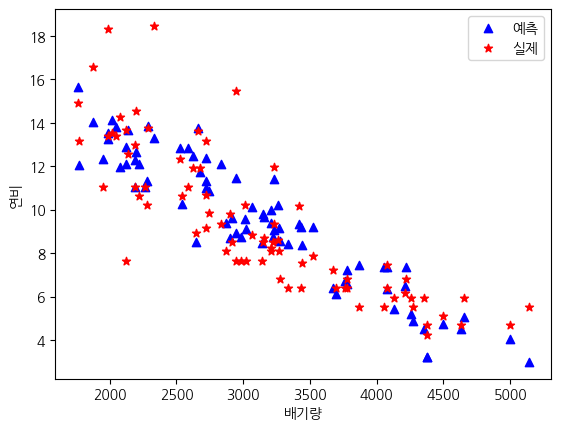

In [23]:
# 산점도로 예상과 실제 비교 ->피쳐 개수가 많아서 불가능 (간단하게 피쳐 하나만 비교)
plt.scatter(X_test['weight'], pre, marker='^', color='blue', label='예측')
plt.scatter(X_test['weight'], Y_test, marker='*', color='red', label='실제')
plt.xlabel('배기량')
plt.ylabel('연비')
plt.legend()

In [24]:
# ++ 스케일링 안했을떄?
model2= LinearRegression()
model2.fit(x_train, Y_train)

LinearRegression()

In [25]:
model2.score(X_test,Y_test)  #거의 비슷

0.7790584168854974